In [1]:
import pandas
import pycaret
import numpy as np
import math
import smogn
import matplotlib.pyplot as plt
#from imblearn.over_sampling import SMOTE
#from sklearn.preprocessing import MinMaxScaler
#import smogn

from pycaret.regression import load_model

In [30]:
filename = "Data_2021_08_13_v1_m.csv"

In [548]:
#csv.to_csv("./Data_2021_08_13_v1_m.csv")

In [29]:
new_array = np.concatenate((N1s,N2s,N1N2),axis=1)
new_array

AxisError: axis 1 is out of bounds for array of dimension 1

N1        N2        d1        d2   freq   move_tx   move_rx  \
0     -0.421325  1.124161  0.087837 -0.621660  40000 -0.703460  0.043938   
1     -0.421325  1.124161  0.575957 -0.369544  40000  1.038213  0.281889   
2     -0.421325  1.124161 -1.190570  1.168363  40000 -1.538312  0.014194   
3     -0.421325  1.124161 -0.470013  0.966670  40000  0.966243  0.504969   
4     -1.408128 -0.982849 -0.237576 -0.268698  40000 -1.495130 -1.532491   
...         ...       ...       ...       ...    ...       ...       ...   
41431  1.552281 -0.456097  0.064594 -1.478854  40000  0.807910  0.445481   
41432  1.552281 -0.456097 -0.400282  0.210322  40000 -1.207250  0.445481   
41433 -1.408128 -0.982849  0.971101 -1.327585  40000 -0.257246 -0.476581   
41434 -1.408128 -0.982849  0.273788 -0.974622  40000 -0.142094 -0.997100   
41435 -1.408128 -0.982849  0.320275 -0.646872  40000  1.340487  0.936256   

       offset_tx  offset_rx       per  ...        l1        l2        h1  \
0      -0.339533  -0.029585 -1.329644  ... -1.105036  1.482958 -1.455018   
1       0.334572   0.336523  0.197825  ...  1.344968  1.195329 -0.959118   
2       1.423510   0.231920  1.038570  ...  1.662028  0.140691 -0.649181   
3      -0.391387  -0.761800 -0.937065  ...  1.517910  0.620072  0.528581   
4      -1.998866  -2.383134 -1.608734  ...  1.546733 -0.242814  0.528581   
...          ...        ...       ...  ...       ...       ...       ...   
41431  -0.028407  -2.017026  0.604301  ... -1.220331 -0.242814  1.334418   
41432   0.179009  -0.709499  1.651179  ... -0.384447  0.907700 -0.029306   
41433  -0.909929  -0.447994 -0.471529  ... -0.701506 -0.626319 -0.835143   
41434  -2.569263  -2.696940  0.800011  ... -1.277978  1.578834  1.582368   
41435  -0.183970  -0.081886  1.427675  ... -1.335625 -0.626319 -1.145081   

             w1        I1        I2  N2s  offset  length4        R2  
0     -1.412072  0.660000  0.441787  256     3.0  2650.88  0.069092  
1      1.151363  0.249000  0.165429  256     0.0  3841.28  0.104411  
2     -0.673455  0.237000  0.162938  256    11.5  2942.08  0.093349  
3      0.412746  0.156000  0.089700  256     3.5  4080.64  0.081742  
4     -0.238975  0.791000  0.537485   64     3.5  1568.16  0.044509  
...         ...       ...       ...  ...     ...      ...       ...  
41431  0.065162  0.227811  0.406000  100    19.0  1951.60  0.100905  
41432  0.108610  0.341543  0.701000  100     8.5  1950.40  0.037921  
41433  0.238954  0.514000  0.454119   64     4.5  1576.72  0.071553  
41434  1.412051  0.242000  0.214170   64     1.0  1949.60  0.060943  
41435  1.064467  0.234000  0.140575   64     1.0  1537.60  0.041126  

[41436 rows x 26 columns]

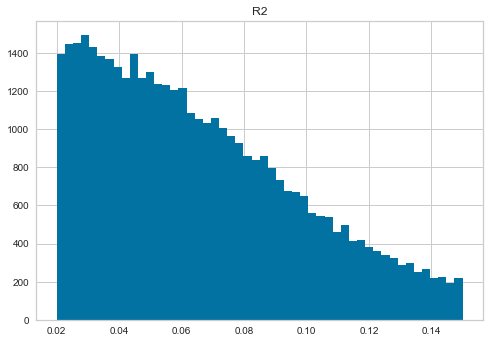

In [100]:
csv = pandas.read_csv(filename)
csv = csv.dropna(axis=0).reset_index(drop=True)#drop NaN

csv = csv[csv['Lmt']>0.1].reset_index(drop=True)
csv = csv[csv['Lmr']>0.1].reset_index(drop=True)
csv = csv[csv['k']>0].reset_index(drop=True)


#N1s = np.zeros(len(csv))
#N2s = np.zeros(len(csv))
#offset = np.zeros(len(csv))

array_len = len(csv)
"""

array_len = len(csv)

for i in range(0, array_len): 

    csv['I1'][i] = csv['I1'][i].replace('i', 'j')
    csv['I2'][i] = csv['I2'][i].replace('i', 'j')
    csv['I1'][i] = csv['I1'][i].replace(' ', '')
    csv['I2'][i] = csv['I2'][i].replace(' ', '')
    csv['I1'][i] = complex(csv['I1'][i]).real
    csv['I2'][i] = complex(csv['I2'][i]).real

    if csv['Lt'][i] > 100 and csv['Lt'][i]/csv['Lmt'][i] > 0.5:
        csv['Lt'][i] = csv['Lt'][i] * 1e-3
    if csv['Lr'][i] > 100 and csv['Lr'][i]/csv['Lmr'][i] > 0.5:
        csv['Lr'][i] = csv['Lr'][i] * 1e-3
    if csv['Lm'][i] > 100 and csv['Lmt'][i] > 50:
        csv['Lm'][i] = csv['Lm'][i] * 1e-3
    if csv['Lm'][i] > 100:
        csv['Lm'][i] = csv['Lm'][i] * 1e-3

csv['I1'] = pandas.to_numeric(csv['I1'], downcast="float")
csv['I2'] = pandas.to_numeric(csv['I2'], downcast="float")

"""



# extra parameter
N1s = csv["N1"].to_numpy() **2
N2s = csv["N2"].to_numpy() **2
offset = abs(csv["offset_tx"]-csv["offset_rx"])
N1N2 = N1s*N2s
sqrtN1N2 = np.sqrt(N1s*N2s)
sqrtN1N22 = np.sqrt(N1s*N2s)**2
space1_ex = csv["space1"].to_numpy() * csv["w1"].to_numpy()
space3_ex = csv["space3"].to_numpy() * csv["l1"].to_numpy() * 2
space2_ex = csv["space2"].to_numpy() * csv["w1"].to_numpy()
space4_ex = csv["space4"].to_numpy() * csv["l1"].to_numpy() * 2
space2_ex2 = csv["space2"].to_numpy() * csv["w1"].to_numpy() * csv["N1"].to_numpy() **2 * csv["N2"].to_numpy() **2  
space4_ex2 = csv["space4"].to_numpy() * csv["l1"].to_numpy() * 2 * csv["N1"].to_numpy() **2 * csv["N2"].to_numpy() **2  
length1 = csv["N1"].to_numpy() * (csv["l1"]*2 + csv["space1"]*2 + csv["w1"] + csv["space3"]*2)/2 + csv["N1"].to_numpy() * (csv["l1"]*2 + csv["space1"]*2 + csv["space5"] *2 + csv["w1"] + csv["space3"]*2)/2
length2 = csv["N1"].to_numpy() * (csv["l1"]*2 + csv["space2"]*2 + csv["w1"] + csv["space4"]*2)/2 + csv["N1"].to_numpy() * (csv["l2"]*2 + csv["space2"]*2 + csv["space6"] *2 + csv["w1"] + csv["space4"]*2)/2
length3 = csv["N2"].to_numpy() * (csv["l1"]*2 + csv["space1"]*2 + csv["w1"] + csv["space3"]*2)/2 + csv["N2"].to_numpy() * (csv["l1"]*2 + csv["space1"]*2 + csv["space5"] *2 + csv["w1"] + csv["space3"]*2)/2
length4 = csv["N2"].to_numpy() * (csv["l1"]*2 + csv["space2"]*2 + csv["w1"] + csv["space4"]*2)/2 + csv["N2"].to_numpy() * (csv["l2"]*2 + csv["space2"]*2 + csv["space6"] *2 + csv["w1"] + csv["space4"]*2)/2
window1 = (csv["l1"].to_numpy() * 2 + csv["space1"].to_numpy() *2) * (csv["w1"].to_numpy() + csv["space3"].to_numpy() *2)
window2 = (csv["l1"].to_numpy() * 2 + csv["space2"].to_numpy() *2) * (csv["w1"].to_numpy() + csv["space4"].to_numpy() *2)
from_l2 = (csv["l2"]).to_numpy() - (csv["space2"]).to_numpy() - (csv["space5"]).to_numpy()
corevolume = (4*csv["l1"].to_numpy() + 2*csv["l2"].to_numpy()) * csv["h1"].to_numpy() * csv["w1"].to_numpy() - 2 * csv["l2"].to_numpy() * csv["h1"].to_numpy() * csv["w1"].to_numpy()
corearea  = 2*csv["l1"].to_numpy() * csv["w1"].to_numpy()

#csv['sqrtN1N2'] = pandas.to_numeric(csv['sqrtN1N2'], downcast="float"

N1s = pandas.DataFrame(N1s,columns=["N1s"])
N2s = pandas.DataFrame(N2s,columns=["N2s"])
offset = pandas.DataFrame(offset,columns=["offset"])
#N1N2 = pandas.DataFrame(N1N2,columns=["N1N2"])
#sqrtN1N2 = pandas.DataFrame(sqrtN1N2,columns=["sqrtN1N2"])
#sqrtN1N22 = pandas.DataFrame(sqrtN1N22,columns=["sqrtN1N22"])
#space1_ex = pandas.DataFrame(space1_ex,columns=["space1_ex"])
#space3_ex = pandas.DataFrame(space3_ex,columns=["space3_ex"])
#space2_ex = pandas.DataFrame(space2_ex,columns=["space2_ex"])
#space4_ex = pandas.DataFrame(space4_ex,columns=["space4_ex"])
#space2_ex2 = pandas.DataFrame(space2_ex2,columns=["space2_ex2"])
#space4_ex2 = pandas.DataFrame(space4_ex2,columns=["space4_ex2"])
length1 = pandas.DataFrame(length1,columns=["length1"])
#length2 = pandas.DataFrame(length2,columns=["length2"])
#length3 = pandas.DataFrame(length3,columns=["length3"])
length4 = pandas.DataFrame(length4,columns=["length4"])
#window1 = pandas.DataFrame(window1,columns=["window1"])
#window2 = pandas.DataFrame(window2,columns=["window2"])
#from_l2 = pandas.DataFrame(from_l2,columns=["from_l2"])
#corevolume = pandas.DataFrame(corevolume,columns=["corevolume"])
#corearea = pandas.DataFrame(corearea ,columns=["corearea"])
 
csv = pandas.concat([csv,N2s,offset,length4],axis=1)



R1 = np.zeros(array_len)
R2 = np.zeros(array_len)

for i in range(0, array_len): 
    R1[i] = csv['copperloss_tx'][i]/csv['I1'][i]/csv['I1'][i]
    R2[i] = csv['copperloss_rx'][i]/csv['I2'][i]/csv['I2'][i]

csv = csv.assign(R1 = R1)
csv = csv.assign(R2 = R2)





# N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,space5,space6,l1,l2,h1,w1,Lmt,Lmr,Llt,Llr,k,Lt,Lr,Lm,Rt,Rr,I1,I2,Zt,Zr,Zm,copperloss_tx,copperloss_rx




#csv = csv[csv['copperloss_tx'] < 1000]
#csv = csv[csv['copperloss_rx'] < 1000]

#csv = csv[csv['Lmr'] < 30]
#csv = csv[csv['Lmr'] > 3]
#csv = csv[csv['Lmr'] < 10]
#csv = csv[csv['Lmr'] > 3]
csv = csv[csv['R2'] < 0.15]
csv = csv[csv['R2'] > 0.02]






#csv = csv[csv['Lr'] < 20]

# normalize data

csv["N1"] = (csv["N1"] - csv.describe().iloc[1,:][0])/csv.describe().iloc[2,:][0]
csv["N2"] = (csv["N2"] - csv.describe().iloc[1,:][1])/csv.describe().iloc[2,:][1]
csv["d1"] = (csv["d1"] - csv.describe().iloc[1,:][2])/csv.describe().iloc[2,:][2]
csv["d2"] = (csv["d2"] - csv.describe().iloc[1,:][3])/csv.describe().iloc[2,:][3]
#csv["freq"] = (csv["freq"] - csv.describe().iloc[1,:][5])/csv.describe().iloc[2,:][5]
csv["move_tx"] = (csv["move_tx"] - csv.describe().iloc[1,:][5])/csv.describe().iloc[2,:][5]
csv["move_rx"] = (csv["move_rx"] - csv.describe().iloc[1,:][6])/csv.describe().iloc[2,:][6]
csv["offset_tx"] = (csv["offset_tx"] - csv.describe().iloc[1,:][7])/csv.describe().iloc[2,:][7]
csv["offset_rx"] = (csv["offset_rx"] - csv.describe().iloc[1,:][8])/csv.describe().iloc[2,:][8]
csv["per"] = (csv["per"] - csv.describe().iloc[1,:][9])/csv.describe().iloc[2,:][9]
csv["space1"] = (csv["space1"] - csv.describe().iloc[1,:][10])/csv.describe().iloc[2,:][10]
csv["space2"] = (csv["space2"] - csv.describe().iloc[1,:][11])/csv.describe().iloc[2,:][11]
csv["space3"] = (csv["space3"] - csv.describe().iloc[1,:][12])/csv.describe().iloc[2,:][12]
csv["space4"] = (csv["space4"] - csv.describe().iloc[1,:][13])/csv.describe().iloc[2,:][13]
csv["space5"] = (csv["space5"] - csv.describe().iloc[1,:][14])/csv.describe().iloc[2,:][14]
csv["space6"] = (csv["space6"] - csv.describe().iloc[1,:][15])/csv.describe().iloc[2,:][15]
csv["l1"] = (csv["l1"] - csv.describe().iloc[1,:][16])/csv.describe().iloc[2,:][16]
csv["l2"] = (csv["l2"] - csv.describe().iloc[1,:][17])/csv.describe().iloc[2,:][17]
csv["h1"] = (csv["h1"] - csv.describe().iloc[1,:][18])/csv.describe().iloc[2,:][18]
csv["w1"] = (csv["w1"] - csv.describe().iloc[1,:][19])/csv.describe().iloc[2,:][19]

'''
csv["N1s"] = (csv["N1s"] - csv.describe().iloc[3,:][24])/(csv.describe().iloc[7,:][24]-csv.describe().iloc[3,:][24])
csv["N2s"] = (csv["N2s"] - csv.describe().iloc[3,:][25])/(csv.describe().iloc[7,:][25]-csv.describe().iloc[3,:][25])
csv["offset"] = (csv["offset"] - csv.describe().iloc[1,:][26])/csv.describe().iloc[2,:][26]
#csv["sqrtN1N22"] = (csv["sqrtN1N22"] - csv.describe().iloc[1,:][27])/csv.describe().iloc[2,:][27]
csv["space2_ex"] = (csv["space2_ex"] - csv.describe().iloc[1,:][28])/csv.describe().iloc[2,:][28]
csv["space4_ex"] = (csv["space4_ex"] - csv.describe().iloc[1,:][29])/csv.describe().iloc[2,:][29]
'''

#csv = csv[csv['R2'] < 0.15]
#csv = csv[csv['R2'] > 0.03]
#csv = csv[csv['R2'] < 0.15]

csv = csv.drop('Rt',axis=1)
csv = csv.drop('Rr',axis=1)
csv = csv.drop('Zt',axis=1)
csv = csv.drop('Zr',axis=1)
csv = csv.drop('Zm',axis=1)
csv = csv.drop('Lmt',axis=1)
csv = csv.drop('Lmr',axis=1)
csv = csv.drop('Llt',axis=1)
csv = csv.drop('Llr',axis=1)
csv = csv.drop('k',axis=1)
csv = csv.drop('Lt',axis=1)
csv = csv.drop('Lr',axis=1)
csv = csv.drop('Lm',axis=1)
csv = csv.drop('copperloss_tx',axis=1)
csv = csv.drop('copperloss_rx',axis=1)
csv = csv.drop('R1',axis=1)
#csv = csv.drop('R2',axis=1)

dataset = csv
dataset = dataset.dropna(axis=0).reset_index(drop=True)



dataset.hist('R2',bins=50)
#dataset.hist('I2',bins=50)

dataset.describe()
dataset



In [101]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)


print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

#data.to_csv("./train_data.csv")

Data for Modeling: (37292, 26)
Unseen Data For Predictions: (4144, 26)


In [102]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'R2', session_id=123, silent=True, use_gpu=False) 

In [103]:
# top3 = [ create_model(name) for name in ["xgboost","lightgbm", "rf"] ]
#top3 = compare_models(n_select = 3) 
#best5 = create_model('lightgbm',num_leaves=60, max_depth=20, min_data_in_leaf=20) # default num_leave : 31 / max_depth = -1 / min_data_in_leaf = 20
#best5 = create_model('mlp')
#best5 = create_model('gbr')
lgbm = create_model('lightgbm',num_leaves=60, max_depth=20, min_data_in_leaf=20) # default num_leave : 31 / max_depth = -1 / min_data_in_leaf = 20
#et = create_model('et')
#rf = create_model('rf')
#top3 = [lgbm, et, rf]

In [104]:
#tuned_top3 = [tune_model(i) for i in top3]

In [105]:
#bagged_top3 = [ensemble_model(i) for i in top3]


In [106]:
#tuned_model = tune_model(best5, optimize = 'MSE')

In [107]:
#blender = blend_models(estimator_list = top3)

In [108]:
#stacked = stack_models(estimator_list=top3)

In [109]:
#automl = automl(optimize = 'RMSE')

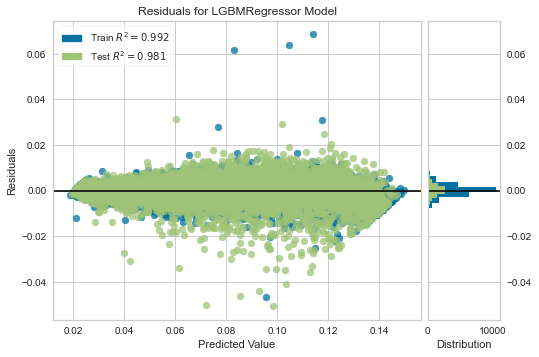

In [110]:
plot_model(estimator = lgbm, plot='residuals')
#plot_model(tuned_model)

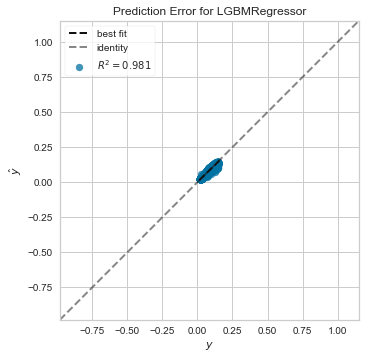

In [111]:
plot_model(estimator = lgbm, plot='error')

In [112]:
evaluate_model(automl)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [113]:
lgbm

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=20,
              min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=20,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=60,
              objective=None, random_state=123, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [114]:
#plot_model(estimator = best5, plot='rfe')

In [115]:
plot_model(estimator = best5, plot = 'feature_all')

NameError: name 'best5' is not defined

In [ ]:
evaluate_model(best5)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [116]:
save_model(lgbm, "ML_model2_v3_2021_08_13_v1_R2")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='R2',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='me...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=20,
                                min_child_samples=20, min_child_weight=0.001,
                  